<a href="https://colab.research.google.com/github/akdubey/AKDU/blob/main/decision_tree__Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os #to creating and removing a directory (folder), fetching its contents

Mount Your Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dirname = '/content/drive/My Drive/Research/dataV'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image

import time
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Original Dataframe
df = pd.read_csv('/content/drive/My Drive/Research/dataV/churn_data.csv')

In [ ]:
df = df.iloc[:,1:]
df.shape

(7043, 20)

In [ ]:
y = df.Churn
X = df.drop('Churn', axis = 1)

In [ ]:
mm = MinMaxScaler()
scaled_df = pd.DataFrame(mm.fit_transform(X), columns = X.columns)
scaled_df.head()

ValueError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

# **1) Vanilla Decision Tree Classifier**

In [ ]:
clf1 = DecisionTreeClassifier(random_state = 33)
clf1.fit(X_train, y_train)

ValueError: ignored

In [ ]:
test_preds1 = clf1.predict(X_test)

In [ ]:
# Calculate and print all four major metrics
print(f"Precision Score: {precision_score(y_test, test_preds1)}")
print(f"Recall Score: {recall_score(y_test, test_preds1)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds1)}")
print(f"F1 Score: {f1_score(y_test, test_preds1)}")

Precision Score: 0.5063025210084033
Recall Score: 0.5020833333333333
Accuracy Score: 0.7308347529812607
F1 Score: 0.50418410041841


AUC Score: 0.6593164519906323


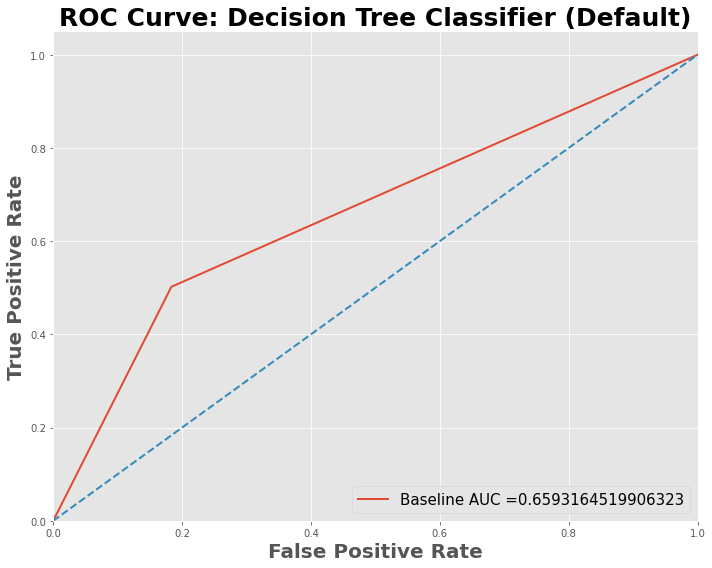

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, test_preds1)
# Calculate AUC score from sklearn.metrics library
roc_auc = auc(fpr, tpr)
# Print auc score
print(f'AUC Score: {roc_auc}')

# Plot AUC curve
plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, lw = 2, label = 'Baseline AUC ='+str(roc_auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: Decision Tree Classifier (Default)', fontsize = 25, fontweight = 'bold')
plt.legend(loc = 4, fontsize = 15)
plt.tight_layout()

In [ ]:
pd.crosstab(y_test, test_preds1, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,1046,235,1281
1,239,241,480
All,1285,476,1761


# **2) GridSearchCV Classifier**

In [ ]:
clf3 = DecisionTreeClassifier(random_state = 33)
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[None, 6, 7, 8, 9, 10, 15, 20],
    'min_samples_split':[20, 25, 30, 35, 40],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]
}
gs_tree = GridSearchCV(clf3, param_grid, cv = 4, verbose = True)
gs_tree.fit(X_train, y_train)

Fitting 4 folds for each of 800 candidates, totalling 3200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=33),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 6, 7, 8, 9, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [20, 25, 30, 35, 40]},
             verbose=True)

In [ ]:
print(f"Best Parameters: {gs_tree.best_params_}")
print(f"Best Score: {gs_tree.best_score_}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 20}
Best Score: 0.79250295345583


# GridSearchCV Decision Tree Model

In [ ]:
final_clf = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 6,
    min_samples_leaf = 1,
    min_samples_split = 30,
    random_state = 33)
final_clf.fit(X_train, y_train)
test_preds2 = final_clf.predict(X_test)

In [ ]:
# Print 4 major metrics
print(f"Precision Score: {precision_score(y_test, test_preds2)}")
print(f"Recall Score: {recall_score(y_test, test_preds2)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds2)}")
print(f"F1 Score: {f1_score(y_test, test_preds2)}")

Precision Score: 0.6707317073170732
Recall Score: 0.4583333333333333
Accuracy Score: 0.7910278250993753
F1 Score: 0.5445544554455446


AUC Score: 0.6870120999219359


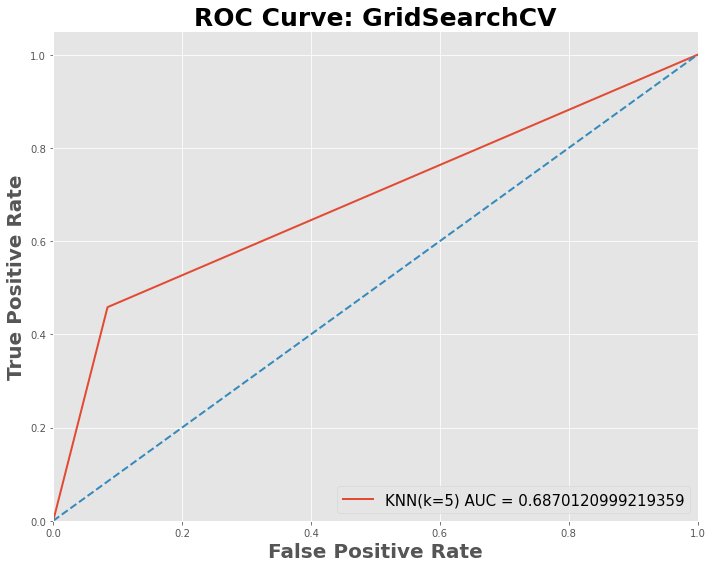

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, test_preds2)
roc_auc = auc(fpr, tpr)
print(f'AUC Score: {roc_auc}')

plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr,lw = 2, label = 'KNN(k=5) AUC = '+str(roc_auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: GridSearchCV', fontsize = 25, fontweight = 'bold')
plt.legend(loc = 4, fontsize = 15)
plt.tight_layout()

In [ ]:
pd.crosstab(y_test, test_preds2, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,1173,108,1281
1,260,220,480
All,1433,328,1761
